In [1]:
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import LineString
import geopandas as gpd
from pyproj import CRS
import mplleaflet
import matplotlib.pyplot as plt
from IPython.display import IFrame
%matplotlib inline
import subprocess
from polycircles import polycircles
import simplekml

In [4]:
!pip install pyshp

  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37263 sha256=1bf613272866580c9912b387771302335c53c7e5e23c46f68fc79d3235246d08
  Stored in directory: c:\users\nithi\appdata\local\pip\cache\wheels\1f\1b\b5\54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built pyshp


In [2]:
df = pd.read_csv('tbl_data.csv')

In [3]:
df.sample(10)

,ogc_fid,wkb_geomet,f_id,lattitude,longitude,name,address,date,time,imei,uploaded,geom1,geom,photo,geom5,p_id,d_id,accuracy,is_farmer
170,493590,NaN,1203857,10.037442,76.995556,appukkuttan,palamadam estate,2019-08-22,11:06 AM,865501037890101,3702,NaN,NaN,1203857.jpg,NaN,180,6,5.36 m,True
292,495347,NaN,496282,10.124507,76.921632,MARY BABY,PLACKAL MANKULAM.P.O.,2020-06-08,12:03 PM,359270081251387,1743,NaN,NaN,496282.jpg,NaN,183,6,7.8 m,True
379,497156,NaN,1206800,10.003381,77.088052,Francis A D,"Attakkarayil, Pottankadu, Pottankadu, Baisonva...",2020-06-25,11:52 AM,0,3681,NaN,NaN,1206800.jpg,NaN,178,6,10.6189995 m,True
367,496986,NaN,1206663,9.996558,76.781103,Sini S Kumar,puthenpurackal h vannappuram,2020-06-24,09:43 AM,0,1278,NaN,NaN,1206663.jpg,NaN,195,6,2.4 m,True
332,496587,NaN,1206324,10.237556,77.142536,Sr Lisbath,Michaelgiri,2019-08-06,01:02 PM,0,2066,NaN,NaN,1206324.jpg,NaN,181,6,6.0 m,True
45,492150,NaN,1202561,9.852243,76.955162,MARY MARCKOSE,"CHATHANAD, KOCHU PAINAVU, Idukki (part), Idukk...",2020-03-06,01:29 PM,861663032245550,1447,NaN,NaN,1202561.jpg,NaN,206,6,3.0 m,True
18,491943,NaN,1202354,9.980543,76.756983,Mathew T Jacob,"THELLIYANKAL, THENNATHUR, Kodikulam, Idukki, K...",2020-03-05,02:52 PM,861663032247846,3691,NaN,NaN,1202354.jpg,NaN,197,6,6.0 m,True
26,492003,NaN,1202414,9.664898,77.180480,Daisamma Joy,"Orathel, Anakkara, Idukki, Kerala, 685512",2020-03-05,06:00 PM,868682042545653,8054,NaN,NaN,1202414.jpg,NaN,214,6,2.6 m,True
194,493849,NaN,1204039,10.011138,76.813762,OMANA PEETHAMBARAN,"CHARTIYAMPURATH, VELLAKAYAM, Vannapuram, Idukk...",2020-04-20,11:30 AM,0,3702,NaN,NaN,1204039.jpg,NaN,195,6,3.216 m,True
239,494248,NaN,1204390,9.808720,77.114656,Mercy,"Nelpurackal, Kalkoonthal, Idukki, Kerala, 685553",2020-05-13,12:47 pm,0,1289,NaN,NaN,1204390.jpg,NaN,212,6,3.7900925 m,True


In [4]:
df1 = df[['lattitude','longitude']]

In [5]:
df1

,lattitude,longitude
0,9.949913,77.181886
1,9.934441,77.177306
2,9.937145,77.171517
3,9.953722,77.155266
4,9.950594,77.156719
...,...,...
495,9.906259,76.807769
496,9.850896,77.054695
497,9.976896,76.712790
498,9.852816,77.055480


In [6]:
geometry = [Point(xy) for xy in zip(df1['longitude'] , df1['lattitude'])]

# crs = {'init': 'epsg:4326'}
crs = CRS('epsg:4326')

gdf = gpd.GeoDataFrame(df1 , crs=crs , geometry=geometry)

In [7]:
gdf.head()

,lattitude,longitude,geometry
0,9.949913,77.181886,POINT (77.18189 9.94991)
1,9.934441,77.177306,POINT (77.17731 9.93444)
2,9.937145,77.171517,POINT (77.17152 9.93715)
3,9.953722,77.155266,POINT (77.15527 9.95372)
4,9.950594,77.156719,POINT (77.15672 9.95059)


<AxesSubplot:>

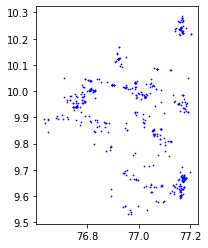

In [8]:
gdf.plot(marker='o', color='b', markersize=0.5)

In [9]:
df1

,lattitude,longitude,geometry
0,9.949913,77.181886,POINT (77.18189 9.94991)
1,9.934441,77.177306,POINT (77.17731 9.93444)
2,9.937145,77.171517,POINT (77.17152 9.93715)
3,9.953722,77.155266,POINT (77.15527 9.95372)
4,9.950594,77.156719,POINT (77.15672 9.95059)
...,...,...,...
495,9.906259,76.807769,POINT (76.80777 9.90626)
496,9.850896,77.054695,POINT (77.05470 9.85090)
497,9.976896,76.712790,POINT (76.71279 9.97690)
498,9.852816,77.055480,POINT (77.05548 9.85282)


In [10]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [11]:
gdf.to_file(filename = 'pointfile.shp' , driver = 'ESRI Shapefile')

In [12]:
df_new = gpd.read_file('/home/iiitmk/Desktop/GIS_repo/csv_shape/pointfile.shp')

DriverError: '/home/iiitmk/Desktop/GIS_repo/csv_shape/pointfile.shp' does not exist in the file system, and is not recognized as a supported dataset name.

In [ ]:
ax = df_new.plot(figsize =(10,10))

In [ ]:
mplleaflet.show(fig=ax.figure, epsg=4326)

In [2]:
def farmer_loc(path):
#     path = str()
    df = pd.read_csv(path)
    df1 = df[['lattitude','longitude']]
    geometry = [Point(xy) for xy in zip(df1['longitude'] , df1['lattitude'])]

    # crs = {'init': 'epsg:4326'}
    crs = CRS('epsg:4326')

    gdf = gpd.GeoDataFrame(df1 , crs=crs , geometry=geometry)
    gdf.to_file(filename = 'my.geojson', driver='GeoJSON')
    df_new = gpd.read_file('my.geojson')
    ax = df_new.plot(figsize =(10,10))
    mplleaflet.show(fig=ax.figure, epsg=4326)
#     IFrame("/home/iiitmk/Desktop/GIS_repo/csv_shape/_map.html", width=560, height=315)


In [3]:
farmer_loc('tbl_data.csv')

C:\Users\nithi\.conda\envs\GIS\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\nithi\.conda\envs\GIS\lib\site-packages\pyproj\crs\crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
C:\Users\nithi\.conda\envs\GIS\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making

In [14]:
from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Point , LineString

proj_wgs84 = pyproj.Proj('+proj=longlat +datum=WGS84')


def geodesic_point_buffer(lat, lon, km):
    # Azimuthal equidistant projection
    aeqd_proj = '+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0'
    project = partial(
        pyproj.transform,
        pyproj.Proj(aeqd_proj.format(lat=lat, lon=lon)),
        proj_wgs84)
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return transform(project, buf).exterior.coords[:]

# Example
b = geodesic_point_buffer(9.94, 77.18, 10.0)

In [15]:
print(b)

[(77.27119143583155, 9.93998758060824), (77.27074988110323, 9.931125982659704), (77.26943442733457, 9.922349957106938), (77.26725781053716, 9.913744011694124), (77.26424105477247, 9.90539101001256), (77.2604132673093, 9.89737137411583), (77.25581135623894, 9.889762310859291), (77.25047967334554, 9.882637069381499), (77.24446958573367, 9.87606423683883), (77.23783898038448, 9.870107079131117), (77.23065170643869, 9.864822932919363), (77.22297696058513, 9.860262654741344), (77.2148886214613, 9.85647013248111), (77.2064645394449, 9.853481863850266), (77.1977857886263, 9.8513266058974), (77.18893588810066, 9.850025098883338), (77.18, 9.849589867150813), (77.17106411189935, 9.850025098883338), (77.16221421137371, 9.851326605897402), (77.15353546055512, 9.853481863850266), (77.14511137853872, 9.85647013248111), (77.13702303941488, 9.860262654741344), (77.12934829356132, 9.864822932919363), (77.12216101961553, 9.870107079131117), (77.11553041426636, 9.876064236838829), (77.10952032665448, 9.8

In [16]:
dff = pd.DataFrame(b,columns=['LAT','LONG'])
print (dff)

          LAT      LONG
0   77.271191  9.939988
1   77.270750  9.931126
2   77.269434  9.922350
3   77.267258  9.913744
4   77.264241  9.905391
..        ...       ...
61  77.267272  9.966233
62  77.269444  9.957626
63  77.270755  9.948849
64  77.271191  9.939988
65  77.271191  9.939988

[66 rows x 2 columns]


In [24]:
dp = dff[0:2]

In [25]:
dp

,LAT,LONG
0,77.271191,9.939988
1,77.270750,9.931126


In [26]:
type(dp)

pandas.core.frame.DataFrame

In [27]:
# geometry1 = [Point(xy) for xy in zip(dff['LAT'] , dff['LONG'])]
line = LineString([Point(xy), Point()]).wkt
# crs = {'init': 'epsg:4326'}
crs = CRS('epsg:4326')

gdf = gpd.GeoDataFrame(dp , crs=crs , geometry=line)

ValueError: Unknown column LINESTRING (77.27 9.93, 77.7075 9.931126000000001)

In [15]:
gdf.head()

,LAT,LONG,geometry
0,77.271191,9.939988,POINT (77.27119 9.93999)
1,77.270750,9.931126,POINT (77.27075 9.93113)
2,77.269434,9.922350,POINT (77.26943 9.92235)
3,77.267258,9.913744,POINT (77.26726 9.91374)
4,77.264241,9.905391,POINT (77.26424 9.90539)


In [16]:
    gdf.to_file(filename = 'buffer.geojson', driver='GeoJSON')
    df_buffer = gpd.read_file('buffer.geojson')
    ax = df_buffer.plot(figsize =(10,10))
    mplleaflet.show(fig=ax.figure, epsg=4326)

C:\Users\nithi\.conda\envs\GIS\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\nithi\.conda\envs\GIS\lib\site-packages\pyproj\crs\crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
C:\Users\nithi\.conda\envs\GIS\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making

In [6]:
def farmer_loc_buffer(path, lat, lon, km):
    df = pd.read_csv(path)
    df1 = df[['lattitude','longitude']]
    geometry = [Point(xy) for xy in zip(df1['longitude'] , df1['lattitude'])]

    # crs = {'init': 'epsg:4326'}
    crs = CRS('epsg:4326')

    gdf = gpd.GeoDataFrame(df1 , crs=crs , geometry=geometry)
    gdf.to_file(filename = 'loc.geojson', driver='GeoJSON')
#     df_new = gpd.read_file('.geojson')
    
    proj_wgs84 = pyproj.Proj('+proj=longlat +datum=WGS84')


    def geodesic_point_buffer():
        # Azimuthal equidistant projection
        aeqd_proj = '+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0'
        project = partial(
            pyproj.transform,
            pyproj.Proj(aeqd_proj.format(lat=lat, lon=lon)),
            proj_wgs84)
        buf = Point(0, 0).buffer(km * 1000)  # distance in metres
        return transform(project, buf).exterior.coords[:]
    
    b = geodesic_point_buffer()
    dff = pd.DataFrame(b,columns=['LAT','LONG'])
#     print (dff)
    geometry1 = [Point(xy) for xy in zip(dff['LAT'] , dff['LONG'])]

    crs = CRS('epsg:4326')
    gdf_buffer = gpd.GeoDataFrame(dff , crs=crs , geometry=geometry1)
    gdf_buffer.to_file(filename = 'buffer.geojson', driver='GeoJSON')
#     df_buffer = gpd.read_file('buffer.geojson')

farmer_loc_buffer('tbl_data.csv',9.94, 77.18, 10.0)

In [8]:
kml = simplekml.Kml()
# kml.newpoint(name="trial", coords=b)
# path = "botanical.kml"
# kml.save(path)

# subprocess.call(['open',path])

In [4]:
poly = polycircles.Polycircle(latitude=9.94991294,
                             longitude=-77.18188607,
                             radius=100.0,
                             number_of_vertices=60)

poly_kml = simplekml.Kml()
circle = poly_kml.newpolygon(name='san diego', outerboundaryis=poly.to_kml())
circle.style.polystyle.color = simplekml.Color.changealphaint(200 , simplekml.Color.green)
path = "circle.kml"
poly_kml.save(path)

In [10]:
import simplekml
kml = simplekml.Kml()
pol = kml.newpolygon(name='A Polygon')
pol.outerboundaryis = [(18.333868,-34.038274), (18.370618,-34.034421),
                       (18.350616,-34.051677),(18.333868,-34.038274)]
pol.innerboundaryis = [(18.347171,-34.040177), (18.355741,-34.039730),
                       (18.350467,-34.048388),(18.347171,-34.040177)]
kml.save("Polygon.kml")

In [11]:
import simplekml
kml = simplekml.Kml()
pol = kml.newpolygon(name='A Polygon')
pol.outerboundaryis = [(18.333868,-34.038274), (18.370618,-34.034421),
                       (18.350616,-34.051677),(18.333868,-34.038274)]
pol.innerboundaryis = [(18.347171,-34.040177), (18.355741,-34.039730),
                       (18.350467,-34.048388),(18.347171,-34.040177)]
pol.style.linestyle.color = simplekml.Color.green
pol.style.linestyle.width = 5
pol.style.polystyle.color = simplekml.Color.changealphaint(100, simplekml.Color.green)
kml.save("Polygon Styling.kml")